In [1]:
import tensorflow as tf

In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import librosa
import librosa.display
import math
import sys
#sys.path.insert(0,'/home/ikwak2/hmd/notebooks')
sys.path.insert(0,'lucashnegri-peakutils-51a679cd8428')
# sys.path.insert(0,'S1-S1-Phonocardiogram-Peak-Detection-Method-in-Python')
sys.path.insert(0,'utils')
from helper_code import *
from get_feature import *
from models import *
from Generator0 import *
from keras.preprocessing import sequence
# import peakutils
from scipy import special
import scipy.io as sio
from keras.preprocessing.sequence import pad_sequences
import peakutils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint

In [3]:
pwd

'/home/jk21/Documents/hmd/jk_classifier'

In [4]:
# data_folder =  'physionet.org/files/circor-heart-sound/1.0.3/training_data'
train_folder =  '/home/jk21/Downloads/Data/data/murmur/train'
test_folder = '/home/jk21/Downloads/Data/data/murmur/test'


In [5]:
model_folder = 'lcnn2'

In [6]:
model_folder

'lcnn2'

In [7]:
def sigmoidal_decay(e, start=0, end=100, lr_start=1e-3, lr_end=1e-5):
    if e < start:
        return lr_start
    elif e > end:
        return lr_end

    middle = (start + end) / 2
    s = lambda x: 1 / (1 + np.exp(-x))

    return s(13 * (-e + middle) / np.abs(end - start)) * np.abs(lr_start - lr_end) + lr_end

In [8]:
patient_files_trn = find_patient_files(train_folder)
patient_files_test = find_patient_files(test_folder)

In [75]:
with open('/home/jk21/Downloads/Data/features_trn_4sec.pickle', 'rb') as f:
    features_trn = pickle.load(f)

In [76]:
with open('/home/jk21/Downloads/Data/features_test_4sec.pickle', 'rb') as f:
    features_test = pickle.load(f)

In [84]:
# from IPython.display import clear_output

In [11]:
## 꼭 바꾸기

per_sec=16000

In [12]:
winlen = 512
hoplen = 256
nmel = 120 
nsec = 20 
trim = 1 
use_mel=True
use_cqt = False 
use_stft = False
use_raw=False
use_interval=True
use_wav2=True
maxlen1 = 246000
min_dist = 500
max_interval_len = 192


In [13]:
model1_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_folder,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)


In [14]:
model2_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_folder,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)    

In [16]:
# per_sec_number=np.array([16000,20000,24000,28000,32000])


# winlen = 512
# hoplen = 256
# nmel = 120 
# nsec = 20 
# trim = 1 
# use_mel=True
# use_cqt = False 
# use_stft = False
# use_raw=False
# use_interval=True
# use_wav2=True
# maxlen1 = 246000
# min_dist = 500
# per_sec=8000
# max_interval_len = 229
    
# params_feature = {'samp_sec': nsec,
                  
#                   #### melspec, stft 피쳐 옵션들  
#                   'pre_emphasis': 0,
                  
#                   'hop_length': hoplen,
                  
#                   'win_length': winlen,
                  
#                   'n_mels': nmel,
#                   #### cqt 피쳐 옵션들  
#                   'filter_scale': 1,
#                   'n_bins': 80,
#                   'fmin': 10,
#                   'maxlen1': maxlen1,
#                   'min_dist':min_dist,
#                   'trim' :1,
#                   'use_mel' : use_mel,
#                   'use_cqt' : use_cqt,
#                   'use_stft' : use_stft,
#                   'use_interval' : use_interval,
                  
#                   'use_wav2' : use_wav2,
                  
#                   'per_sec' : per_sec,
#                   'max_interval_len' : 229}

# features_trn, mel_input_shape, cqt_input_shape,stft_input_shape,interval_input_shape,wav2_input_shape = get_features_3lb_all_ord(train_folder, patient_files_trn, **params_feature)
# features_test, mel_input_shape, cqt_input_shape,stft_input_shape,interval_input_shape,wav2_input_shape= get_features_3lb_all_ord(test_folder, patient_files_test, **params_feature)
# with open('/home/jk21/Downloads/Data/features_trn_' + str(int(8000/4000)) + 'sec.pickle', 'wb') as f:
#     pickle.dump(features_trn, f, pickle.HIGHEST_PROTOCOL)
# with open('/home/jk21/Downloads/Data/features_test_' + str(int(8000/4000)) + 'sec.pickle', 'wb') as f:
#     pickle.dump(features_test, f, pickle.HIGHEST_PROTOCOL)    

    
# print('done')

100%|█████████████████████████████████████████| 751/751 [15:30<00:00,  1.24s/it]


melspec:  120 313
cqt:  1 1
stft:  1 1
interval:  229 1
wav2:  (246000,)


100%|█████████████████████████████████████████| 191/191 [04:35<00:00,  1.44s/it]


melspec:  120 313
cqt:  1 1
stft:  1 1
interval:  229 1
wav2:  (246000,)
done


In [15]:
params_feature = {'samp_sec': nsec,
                  #### melspec, stft 피쳐 옵션들  
                  'pre_emphasis': 0,
                  'hop_length': hoplen,
                  'win_length': winlen,
                  'n_mels': nmel,
                  #### cqt 피쳐 옵션들  
                  'filter_scale': 1,
                  'n_bins': 80,
                  'fmin': 10,
                  'maxlen1': maxlen1,
                  'min_dist':min_dist,
                  'max_interval_len' : max_interval_len,
                  'trim' :1,
                  'use_mel' : use_mel,
                  'use_cqt' : use_cqt,
                  'use_stft' : use_stft,
                  'use_interval' : use_interval,
                  'use_wav2' : use_wav2,
                  'per_sec' : per_sec
}

In [165]:
# features_trn, mel_input_shape, cqt_input_shape,stft_input_shape,interval_input_shape,wav2_input_shape = get_features_3lb_all_ord(train_folder, patient_files_trn, **params_feature)


In [166]:
# features_test, mel_input_shape, cqt_input_shape,stft_input_shape,interval_input_shape,wav2_input_shape= get_features_3lb_all_ord(test_folder, patient_files_test, **params_feature)

In [16]:
mm_weight = 3 #np.random.choice([2,3,4,5])
oo_weight = 3 #np.random.choice([2,3,4,5,6])
ord1 = True #np.random.choice([True,False])
mm_mean = False #np.random.choice([True,False])
dp = 0 #np.random.choice([0, .1, .2, .3])
fc = False #np.random.choice([True,False])
ext = True
chaug = 10 #np.random.choice([0, 10])
mixup = True #np.random.choice([True,False])
cout = .8 #np.random.choice([0, 0.8])
wunknown = 1 #np.random.choice([1, 0.7, .5, .2])
n1 = 0 #np.random.choice([0,2])
if n1 == 0 :
    ranfil = False
else :
    ranfil = [n1, [18,19,20,21,22,23]]

In [17]:
params_feature['ord1'] = ord1
params_feature['mm_mean'] = mm_mean
params_feature['dp'] = dp
params_feature['fc'] = fc
params_feature['ext'] = ext
params_feature['oo_weight'] = oo_weight
params_feature['mm_weight'] = mm_weight
params_feature['chaug'] = chaug
params_feature['cout'] = cout
params_feature['wunknown'] = wunknown
params_feature['mixup'] = mixup
params_feature['n1'] = n1

In [18]:
params_feature

{'samp_sec': 20,
 'pre_emphasis': 0,
 'hop_length': 256,
 'win_length': 512,
 'n_mels': 120,
 'filter_scale': 1,
 'n_bins': 80,
 'fmin': 10,
 'maxlen1': 246000,
 'min_dist': 500,
 'max_interval_len': 229,
 'trim': 1,
 'use_mel': True,
 'use_cqt': False,
 'use_stft': False,
 'use_interval': True,
 'use_wav2': True,
 'per_sec': 8000,
 'ord1': True,
 'mm_mean': False,
 'dp': 0,
 'fc': False,
 'ext': True,
 'oo_weight': 3,
 'mm_weight': 3,
 'chaug': 10,
 'cout': 0.8,
 'wunknown': 1,
 'mixup': True,
 'n1': 0}

In [97]:
# with open('/home/jk21/Downloads/Data/features_trn_3sec.pickle', 'wb') as f:
#     pickle.dump(features_trn, f, pickle.HIGHEST_PROTOCOL)

In [98]:
# with open('/home/jk21/Downloads/Data/features_test_3sec.pickle', 'wb') as f:
#     pickle.dump(features_test, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
#################################################

In [17]:
from skimage.transform import resize
import matplotlib.pyplot as plt

In [18]:
tmp_wav2 = np.zeros((2532,32,374,1))
for i in range(len(features_trn['wav2'])):
    test_ary=features_trn['wav2'][i]
    res = resize(test_ary, (32,374,1))
    tmp_wav2[i]=res
    

In [19]:
features_trn['wav2'] = tmp_wav2

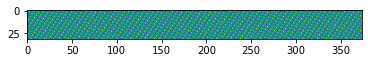

In [25]:
plt.imshow(features_trn['wav2'][30])

In [20]:
tmp_wav2 = np.zeros((631,32,374,1))
for i in range(len(features_test['wav2'])):
    test_ary=features_test['wav2'][i]
    res = resize(test_ary, (32,374,1))
    tmp_wav2[i]=res

In [21]:
features_test['wav2'] = tmp_wav2

In [ ]:
##################################################

In [19]:
mel_input_shape = features_trn['mel1'].shape[1:]

In [20]:
mel_input_shape

(120, 313, 1)

In [21]:
cqt_input_shape = features_trn['cqt1'].shape[1:]

In [22]:
cqt_input_shape

(1, 1, 1)

In [23]:
stft_input_shape = features_trn['stft1'].shape[1:]

In [24]:
stft_input_shape

(1, 1, 1)

In [25]:
interval_input_shape= features_trn['interval'].shape[1:]

In [26]:
interval_input_shape

(229, 1)

In [27]:
wav2_input_shape= features_trn['wav2'].shape[1:]

In [28]:
wav2_input_shape

(246000,)

In [29]:
for i in range(len(features_trn['interval'])):
    features_trn['interval'][i]=np.array(features_trn['interval'][i])

In [30]:
for i in range(len(features_trn['mel1'])):
    features_trn['mel1'][i]=np.array(features_trn['mel1'][i])

In [37]:
model1 = get_LCNN_o_4_dr_1(mel_input_shape, cqt_input_shape, stft_input_shape,interval_input_shape,wav2_input_shape, use_mel = use_mel, use_cqt = use_cqt, use_stft = use_stft, ord1 = ord1, dp = dp, fc = fc, ext = ext,use_wav2=use_wav2)

In [38]:

model2 = get_LCNN_o_4_dr_1(mel_input_shape, cqt_input_shape, stft_input_shape,interval_input_shape,wav2_input_shape, use_mel = use_mel, use_cqt = use_cqt, use_stft = use_stft, ord1 = ord1, dp = dp, fc = fc, ext = ext,use_wav2=use_wav2)


In [39]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wav2 (InputLayer)              [(None, 246000)]     0           []                               
                                                                                                  
 interval (InputLayer)          [(None, 229, 1)]     0           []                               
                                                                                                  
 reshape_2 (Reshape)            (None, 300, 820)     0           ['wav2[0][0]']                   
                                                                                                  
 conv1d_160 (Conv1D)            (None, 229, 9)       36          ['interval[0][0]']               
                                                                                            

 max_pooling1d_83 (MaxPooling1D  (None, 225, 9)      0           ['maximum_101[0][0]']            
 )                                                                                                
                                                                                                  
 max_pooling1d_103 (MaxPooling1  (None, 296, 9)      0           ['maximum_121[0][0]']            
 D)                                                                                               
                                                                                                  
 conv1d_168 (Conv1D)            (None, 225, 9)       171         ['max_pooling1d_83[0][0]']       
                                                                                                  
 conv1d_208 (Conv1D)            (None, 296, 9)       171         ['max_pooling1d_103[0][0]']      
                                                                                                  
 maximum_1

                                                                                                  
 conv1d_177 (Conv1D)            (None, 221, 9)       171         ['max_pooling1d_87[0][0]']       
                                                                                                  
 conv1d_216 (Conv1D)            (None, 292, 9)       171         ['max_pooling1d_107[0][0]']      
                                                                                                  
 conv1d_217 (Conv1D)            (None, 292, 9)       171         ['max_pooling1d_107[0][0]']      
                                                                                                  
 maximum_106 (Maximum)          (None, 221, 9)       0           ['conv1d_176[0][0]',             
                                                                  'conv1d_177[0][0]']             
                                                                                                  
 maximum_1

 conv2d_38 (Conv2D)             (None, 60, 157, 32)  1056        ['max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_39 (Conv2D)             (None, 60, 157, 32)  1056        ['max_pooling2d_8[0][0]']        
                                                                                                  
 max_pooling1d_91 (MaxPooling1D  (None, 217, 9)      0           ['maximum_109[0][0]']            
 )                                                                                                
                                                                                                  
 max_pooling1d_111 (MaxPooling1  (None, 288, 9)      0           ['maximum_129[0][0]']            
 D)                                                                                               
                                                                                                  
 maximum_1

                                                                  'conv1d_228[0][0]']             
                                                                                                  
 batch_normalization_14 (BatchN  (None, 30, 79, 48)  144         ['maximum_141[0][0]']            
 ormalization)                                                                                    
                                                                                                  
 max_pooling1d_94 (MaxPooling1D  (None, 214, 9)      0           ['maximum_112[0][0]']            
 )                                                                                                
                                                                                                  
 max_pooling1d_114 (MaxPooling1  (None, 285, 9)      0           ['maximum_132[0][0]']            
 D)                                                                                               
          

 maximum_144 (Maximum)          (None, 15, 40, 32)   0           ['conv2d_48[0][0]',              
                                                                  'conv2d_49[0][0]']              
                                                                                                  
 maximum_115 (Maximum)          (None, 212, 9)       0           ['conv1d_194[0][0]',             
                                                                  'conv1d_195[0][0]']             
                                                                                                  
 maximum_135 (Maximum)          (None, 283, 9)       0           ['conv1d_234[0][0]',             
                                                                  'conv1d_235[0][0]']             
                                                                                                  
 batch_normalization_16 (BatchN  (None, 15, 40, 32)  96          ['maximum_144[0][0]']            
 ormalizat

                                                                                                  
 dense_14 (Dense)               (None, 1)            3           ['height_weight[0][0]']          
                                                                                                  
 dense_15 (Dense)               (None, 3)            18          ['loc[0][0]']                    
                                                                                                  
 is_preg (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 max_pooling1d_99 (MaxPooling1D  (None, 209, 9)      0           ['maximum_117[0][0]']            
 )                                                                                                
                                                                                                  
 max_pooli

In [40]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 wav2 (InputLayer)              [(None, 246000)]     0           []                               
                                                                                                  
 interval (InputLayer)          [(None, 229, 1)]     0           []                               
                                                                                                  
 reshape_3 (Reshape)            (None, 300, 820)     0           ['wav2[0][0]']                   
                                                                                                  
 conv1d_240 (Conv1D)            (None, 229, 9)       36          ['interval[0][0]']               
                                                                                            

 max_pooling1d_123 (MaxPooling1  (None, 225, 9)      0           ['maximum_150[0][0]']            
 D)                                                                                               
                                                                                                  
 max_pooling1d_143 (MaxPooling1  (None, 296, 9)      0           ['maximum_170[0][0]']            
 D)                                                                                               
                                                                                                  
 conv1d_248 (Conv1D)            (None, 225, 9)       171         ['max_pooling1d_123[0][0]']      
                                                                                                  
 conv1d_288 (Conv1D)            (None, 296, 9)       171         ['max_pooling1d_143[0][0]']      
                                                                                                  
 maximum_1

                                                                                                  
 conv1d_257 (Conv1D)            (None, 221, 9)       171         ['max_pooling1d_127[0][0]']      
                                                                                                  
 conv1d_296 (Conv1D)            (None, 292, 9)       171         ['max_pooling1d_147[0][0]']      
                                                                                                  
 conv1d_297 (Conv1D)            (None, 292, 9)       171         ['max_pooling1d_147[0][0]']      
                                                                                                  
 maximum_155 (Maximum)          (None, 221, 9)       0           ['conv1d_256[0][0]',             
                                                                  'conv1d_257[0][0]']             
                                                                                                  
 maximum_1

                                                                                                  
 conv2d_56 (Conv2D)             (None, 60, 157, 32)  1056        ['max_pooling2d_12[0][0]']       
                                                                                                  
 conv2d_57 (Conv2D)             (None, 60, 157, 32)  1056        ['max_pooling2d_12[0][0]']       
                                                                                                  
 max_pooling1d_131 (MaxPooling1  (None, 217, 9)      0           ['maximum_158[0][0]']            
 D)                                                                                               
                                                                                                  
 max_pooling1d_151 (MaxPooling1  (None, 288, 9)      0           ['maximum_178[0][0]']            
 D)                                                                                               
          

                                                                                                  
 maximum_181 (Maximum)          (None, 286, 9)       0           ['conv1d_308[0][0]',             
                                                                  'conv1d_308[0][0]']             
                                                                                                  
 batch_normalization_20 (BatchN  (None, 30, 79, 48)  144         ['maximum_190[0][0]']            
 ormalization)                                                                                    
                                                                                                  
 max_pooling1d_134 (MaxPooling1  (None, 214, 9)      0           ['maximum_161[0][0]']            
 D)                                                                                               
                                                                                                  
 max_pooli

 conv1d_315 (Conv1D)            (None, 283, 9)       171         ['max_pooling1d_156[0][0]']      
                                                                                                  
 maximum_193 (Maximum)          (None, 15, 40, 32)   0           ['conv2d_66[0][0]',              
                                                                  'conv2d_67[0][0]']              
                                                                                                  
 maximum_164 (Maximum)          (None, 212, 9)       0           ['conv1d_274[0][0]',             
                                                                  'conv1d_275[0][0]']             
                                                                                                  
 maximum_184 (Maximum)          (None, 283, 9)       0           ['conv1d_314[0][0]',             
                                                                  'conv1d_315[0][0]']             
          

                                                                                                  
 dense_19 (Dense)               (None, 1)            3           ['sex_cat[0][0]']                
                                                                                                  
 dense_20 (Dense)               (None, 1)            3           ['height_weight[0][0]']          
                                                                                                  
 dense_21 (Dense)               (None, 3)            18          ['loc[0][0]']                    
                                                                                                  
 is_preg (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 max_pooling1d_139 (MaxPooling1  (None, 209, 9)      0           ['maximum_166[0][0]']            
 D)       

In [41]:
n_epoch = 100
lr = LearningRateScheduler(lambda e: sigmoidal_decay(e, end=n_epoch))
batch_size = 64

if mixup :
    beta_param = .7
else :
    beta_param = 0
    


params = {'batch_size': batch_size,
          #          'input_shape': (100, 313, 1),
          'shuffle': True,
          'chaug': chaug,
          'beta_param': beta_param,
          'cout': cout
#              'mixup': mixup,
          #          'lowpass': [.5, [11,12,13,14,15,16,17,18]]
          #          'highpass': [.5, [78,79,80,81,82,83,84,85]]
#              'ranfilter2' : [3, [18,19,20,21,22,23]]
          #           'dropblock' : [30, 100]
          #'device' : device
}

if mixup :
    params['mixup'] = mixup
    params['ranfilter2'] = ranfil
else :
    params['cutout'] = cout

params_no_shuffle = {'batch_size': batch_size,
                     #          'input_shape': (100, 313, 1),
                     'shuffle': False,
                     'beta_param': 0.7,
                     'mixup': False
                     #'device': device
}


# TrainDGen_1 = Generator0([features_trn['age'],features_trn['sex'], features_trn['hw'], features_trn['preg'], features_trn['loc'],
#             features_trn['interval'],features_trn['wav2'],features_trn['mel1'],features_trn['cqt1'],features_trn['stft1']], 
#            features_trn['mm_labels'],  ## our Y
#                         **params)()


# ValidDGen_1 = Generator0([features_test['age'],features_test['sex'], features_test['hw'], 
#                               features_test['preg'], features_test['loc'],features_test['interval'],
#                               features_test['wav2'], features_test['mel1'],features_test['cqt1'],features_test['stft1']], 
#                              features_test['mm_labels'],  ## our Y
                         
#                          **params)()





if ord1 :
    class_weight = {0: mm_weight, 1: 1.}
else :
    class_weight = {0: mm_weight, 1: wunknown, 2:1.}

    
    
    
    

if mixup :
    
    
    TrainDGen_1 = Generator0([features_trn['age'],features_trn['sex'], features_trn['hw'], 
                              features_trn['preg'], features_trn['loc'],features_trn['interval'],features_trn['wav2'],
                              features_trn['mel1'],
                              features_trn['cqt1'],
                              features_trn['stft1']],features_trn['mm_labels'],**params)()
    
    model1.fit(TrainDGen_1,
               validation_data = ([features_test['age'],features_test['sex'], features_test['hw'],                                   
                                   features_test['preg'], features_test['loc'],features_test['interval'],features_test['wav2'],
                                   features_test['mel1'],
                                   features_test['cqt1'],
                                   features_test['stft1']],features_test['mm_labels']),
               
               callbacks=[lr,model1_callback],
               steps_per_epoch=np.ceil(len(features_trn['mm_labels'])/batch_size),
               class_weight=class_weight, 
               epochs = n_epoch)
    
    
 


Epoch 1/100
40/40 [==============================] - 17s 265ms/step - loss: 12.8563 - accuracy: 0.5938 - auc: 0.6346 - val_loss: 1.3724 - val_accuracy: 0.4976 - val_auc: 0.4738 - lr: 9.9851e-04
Epoch 2/100
40/40 [==============================] - 5s 133ms/step - loss: 1.3213 - accuracy: 0.6500 - auc: 0.7034 - val_loss: 0.5981 - val_accuracy: 0.7813 - val_auc: 0.8271 - lr: 9.9831e-04
Epoch 3/100
40/40 [==============================] - 6s 162ms/step - loss: 1.0135 - accuracy: 0.6953 - auc: 0.7683 - val_loss: 0.5368 - val_accuracy: 0.7876 - val_auc: 0.8397 - lr: 9.9807e-04
Epoch 4/100
40/40 [==============================] - 6s 162ms/step - loss: 0.9565 - accuracy: 0.7047 - auc: 0.7894 - val_loss: 0.6231 - val_accuracy: 0.7242 - val_auc: 0.7640 - lr: 9.9781e-04
Epoch 5/100
40/40 [==============================] - 6s 163ms/step - loss: 0.9564 - accuracy: 0.7324 - auc: 0.7964 - val_loss: 0.5952 - val_accuracy: 0.7496 - val_auc: 0.7871 - lr: 9.9750e-04
Epoch 6/100
40/40 [===================

40/40 [==============================] - 7s 165ms/step - loss: 0.7387 - accuracy: 0.8383 - auc: 0.9168 - val_loss: 0.3917 - val_accuracy: 0.8811 - val_auc: 0.9422 - lr: 2.1772e-05
Epoch 86/100
40/40 [==============================] - 7s 166ms/step - loss: 0.7469 - accuracy: 0.8270 - auc: 0.9088 - val_loss: 0.3998 - val_accuracy: 0.8700 - val_auc: 0.9404 - lr: 2.0352e-05
Epoch 87/100
40/40 [==============================] - 7s 165ms/step - loss: 0.7532 - accuracy: 0.8336 - auc: 0.9132 - val_loss: 0.3875 - val_accuracy: 0.8811 - val_auc: 0.9440 - lr: 1.9102e-05
Epoch 88/100
40/40 [==============================] - 7s 166ms/step - loss: 0.7343 - accuracy: 0.8359 - auc: 0.9206 - val_loss: 0.3832 - val_accuracy: 0.8843 - val_auc: 0.9446 - lr: 1.8001e-05
Epoch 89/100
40/40 [==============================] - 7s 167ms/step - loss: 0.7499 - accuracy: 0.8254 - auc: 0.9142 - val_loss: 0.3930 - val_accuracy: 0.8796 - val_auc: 0.9429 - lr: 1.7033e-05
Epoch 90/100
40/40 [============================

In [42]:
n_epoch = 100
lr = LearningRateScheduler(lambda e: sigmoidal_decay(e, end=n_epoch))

batch_size = 64

if mixup :
    beta_param = .7
else :
    beta_param = 0
    
params = {'batch_size': batch_size,
          #          'input_shape': (100, 313, 1),
          'shuffle': True,
          'chaug': 0,
          'beta_param': beta_param,
          'cout': cout,
#              'mixup': True,
          #          'lowpass': [.5, [11,12,13,14,15,16,17,18]]
#            'highpass': [.5, [78,79,80,81,82,83,84,85]],
#              'ranfilter2' : [3, [18,19,20,21,22,23]]
        #           'dropblock' : [30, 100]
          #'device' : device
}



if mixup :
    params['mixup'] = mixup
    params['ranfilter2'] = ranfil
else :
    params['cutout'] = cout


params_no_shuffle = {'batch_size': batch_size,
                     #          'input_shape': (100, 313, 1),
                     'shuffle': False,
                     'beta_param': 0.7,
                     'mixup': False
                     #'device': device
}




if mixup :

    
    class_weight = {0: oo_weight, 1: 1.}
    TrainDGen_1 = Generator0([features_trn['age'],features_trn['sex'], features_trn['hw'], 
                              features_trn['preg'], features_trn['loc'],features_trn['interval'],
                              features_trn['wav2'],features_trn['mel1'], features_trn['cqt1'],
                              features_trn['stft1']],  features_trn['out_labels'], **params)()

    model2.fit(TrainDGen_1,
               validation_data = ([features_test['age'],features_test['sex'], features_test['hw'],                                   
                                   features_test['preg'], features_test['loc'],features_test['interval'],
                                   features_test['wav2'],
                                   features_test['mel1'],
                                   features_test['cqt1'],
                                   features_test['stft1']],features_test['out_labels']), 
               
               callbacks=[lr,model2_callback],
               steps_per_epoch=np.ceil(len(features_trn['out_labels'])/batch_size),
               class_weight=class_weight, 
               epochs = n_epoch)
    


Epoch 1/100
40/40 [==============================] - 14s 228ms/step - loss: 11.8720 - accuracy: 0.4605 - auc: 0.4672 - val_loss: 23.3569 - val_accuracy: 0.5008 - val_auc: 0.5008 - lr: 9.9851e-04
Epoch 2/100
40/40 [==============================] - 5s 129ms/step - loss: 2.3787 - accuracy: 0.4602 - auc: 0.4798 - val_loss: 5.5245 - val_accuracy: 0.5040 - val_auc: 0.5175 - lr: 9.9831e-04
Epoch 3/100
40/40 [==============================] - 6s 153ms/step - loss: 1.7962 - accuracy: 0.5113 - auc: 0.5118 - val_loss: 1.0879 - val_accuracy: 0.5119 - val_auc: 0.5206 - lr: 9.9807e-04
Epoch 4/100
40/40 [==============================] - 6s 158ms/step - loss: 1.5821 - accuracy: 0.5031 - auc: 0.5152 - val_loss: 1.5111 - val_accuracy: 0.5309 - val_auc: 0.5523 - lr: 9.9781e-04
Epoch 5/100
40/40 [==============================] - 7s 167ms/step - loss: 1.5035 - accuracy: 0.4961 - auc: 0.5224 - val_loss: 0.9987 - val_accuracy: 0.5040 - val_auc: 0.5083 - lr: 9.9750e-04
Epoch 6/100
40/40 [==================

40/40 [==============================] - 7s 164ms/step - loss: 1.1185 - accuracy: 0.5437 - auc: 0.6571 - val_loss: 0.6885 - val_accuracy: 0.5372 - val_auc: 0.6103 - lr: 2.1772e-05
Epoch 86/100
40/40 [==============================] - 7s 165ms/step - loss: 1.1335 - accuracy: 0.5609 - auc: 0.6532 - val_loss: 0.7322 - val_accuracy: 0.5119 - val_auc: 0.5888 - lr: 2.0352e-05
Epoch 87/100
40/40 [==============================] - 7s 165ms/step - loss: 1.1366 - accuracy: 0.5555 - auc: 0.6622 - val_loss: 0.7177 - val_accuracy: 0.5135 - val_auc: 0.5949 - lr: 1.9102e-05
Epoch 88/100
40/40 [==============================] - 6s 163ms/step - loss: 1.1150 - accuracy: 0.5574 - auc: 0.6560 - val_loss: 0.6950 - val_accuracy: 0.5293 - val_auc: 0.6045 - lr: 1.8001e-05
Epoch 89/100
40/40 [==============================] - 7s 165ms/step - loss: 1.1151 - accuracy: 0.5539 - auc: 0.6549 - val_loss: 0.7278 - val_accuracy: 0.5182 - val_auc: 0.5887 - lr: 1.7033e-05
Epoch 90/100
40/40 [============================

In [43]:
params_feature

{'samp_sec': 20,
 'pre_emphasis': 0,
 'hop_length': 256,
 'win_length': 512,
 'n_mels': 120,
 'filter_scale': 1,
 'n_bins': 80,
 'fmin': 10,
 'maxlen1': 246000,
 'min_dist': 500,
 'max_interval_len': 229,
 'trim': 1,
 'use_mel': True,
 'use_cqt': False,
 'use_stft': False,
 'use_interval': True,
 'use_wav2': True,
 'per_sec': 8000,
 'ord1': True,
 'mm_mean': False,
 'dp': 0,
 'fc': False,
 'ext': True,
 'oo_weight': 3,
 'mm_weight': 3,
 'chaug': 10,
 'cout': 0.8,
 'wunknown': 1,
 'mixup': True,
 'n1': 0}

In [44]:
params_feature['mel_shape'] = mel_input_shape
params_feature['cqt_shape'] = cqt_input_shape
params_feature['stft_shape'] = stft_input_shape
params_feature['interval_input_shape'] = interval_input_shape
params_feature['wav2_input_shape'] = wav2_input_shape
params_feature['max_interval_len'] = max_interval_len

In [45]:
params_feature

{'samp_sec': 20,
 'pre_emphasis': 0,
 'hop_length': 256,
 'win_length': 512,
 'n_mels': 120,
 'filter_scale': 1,
 'n_bins': 80,
 'fmin': 10,
 'maxlen1': 246000,
 'min_dist': 500,
 'max_interval_len': 229,
 'trim': 1,
 'use_mel': True,
 'use_cqt': False,
 'use_stft': False,
 'use_interval': True,
 'use_wav2': True,
 'per_sec': 8000,
 'ord1': True,
 'mm_mean': False,
 'dp': 0,
 'fc': False,
 'ext': True,
 'oo_weight': 3,
 'mm_weight': 3,
 'chaug': 10,
 'cout': 0.8,
 'wunknown': 1,
 'mixup': True,
 'n1': 0,
 'mel_shape': (120, 313, 1),
 'cqt_shape': (1, 1, 1),
 'stft_shape': (1, 1, 1),
 'interval_input_shape': (229, 1),
 'wav2_input_shape': (246000,)}

In [46]:
import pickle as pk
def save_challenge_model(model_folder, model1, model2, m_name1, m_name2, param_feature) :
    os.makedirs(model_folder, exist_ok=True)
    info_fnm = os.path.join(model_folder, 'desc.pk')
    filename1 = os.path.join(model_folder, m_name1 + '_model1.hdf5')
    filename2 = os.path.join(model_folder, m_name2 + '_model2.hdf5')
    model1.save(filename1)
    model2.save(filename2)
    param_feature['model1'] = m_name1
    param_feature['model2'] = m_name2
    param_feature['model_fnm1'] = filename1
    param_feature['model_fnm2'] = filename2
    with open(info_fnm, 'wb') as f:
        pk.dump(param_feature, f, pk.HIGHEST_PROTOCOL)
    return 1

    with open(info_fnm, 'wb') as f:
        pk.dump(param_feature, f, pk.HIGHEST_PROTOCOL)
    return 1
    

In [47]:
model_folder

'lcnn2'

In [48]:
save_challenge_model(model_folder, model1, model2, m_name1 = 'lcnn1', m_name2 = 'lcnn2', param_feature = params_feature)

1

In [49]:
def load_challenge_model(model_folder, verbose):
    info_fnm = os.path.join(model_folder, 'desc.pk')
    with open(info_fnm, 'rb') as f:
        info_m = pk.load(f)

    return info_m

In [50]:
def run_challenge_model(model, data, recordings, verbose):
    
    murmur_classes = ['Present', 'Unknown', 'Absent']
    outcome_classes = ['Abnormal', 'Normal']

##########################################################################    
    if model['model1'] == 'lcnn1' :
        model1 = get_LCNN_o_4_dr_1(model['mel_shape'],model['cqt_shape'],model['stft_shape'], model['interval_input_shape'],model['wav2_input_shape']
                                 , use_mel = model['use_mel'],use_cqt = model['use_cqt'], use_stft = model['use_stft'], 
                                 ord1 = model['ord1'], dp = model['dp'], fc = model['fc'], ext = model['ext'],use_wav2=model['use_wav2'])    
    if model['model1'] == 'lcnn2' :
        model1 = get_LCNN_o_4_dr_1(model['mel_shape'],model['cqt_shape'],model['stft_shape'], model['interval_input_shape'],model['wav2_input_shape']
                                 , use_mel = model['use_mel'],use_cqt = model['use_cqt'], use_stft = model['use_stft'], 
                                 ord1 = model['ord1'], dp = model['dp'], fc = model['fc'], ext = model['ext'],use_wav2=model['use_wav2'])   
    model1.load_weights(model['model_fnm1'])
    model2.load_weights(model['model_fnm2'])
############################################################################ 


    maxlen1 = params_feature['maxlen1']
    min_dist = params_feature['min_dist']
    max_interval_len = params_feature['max_interval_len']
    
    
    # Load features.
    features = get_feature_one(data, verbose = 0)

    samp_sec = model['samp_sec'] 
    pre_emphasis = model['pre_emphasis']
    hop_length = model['hop_length']
    win_length = model['win_length']
    n_mels = model['n_mels']
    filter_scale = model['filter_scale']
    n_bins = model['n_bins']
    fmin = model['fmin']
    trim = model['trim']
    use_mel = model['use_mel']
    use_cqt = model['use_cqt']
    use_stft = model['use_stft']
    use_interval = model['use_interval']
    use_wav2 = model['use_wav2']
    maxlen1 = model['maxlen1']
    min_dist = model['min_dist']
    per_sec = model['per_sec']
    
#    use_raw = model['use_raw']
    features['wav2'] = []
    tmp_wav=[] 
    features['interval'] = []
    tmp_total_interval = [] 
         
    if use_wav2:

        for i in range(len(recordings)):
            data = recordings[i]
            tmp_wav.append(data)

        padded =pad_sequences(tmp_wav, maxlen=maxlen1, dtype='float64', padding='post', truncating='post', value=0.0)

        padded=np.array(padded, dtype=np.float32)
        for i in range(len(padded)):
            features['wav2'].append(padded[i])

        features['wav2'] = np.array(features['wav2'])
    

       
    if use_interval:


        for i in tqdm.tqdm(range(len(recordings))) :
            
            datos=recordings[i]
            filtros=sio.loadmat('./Filters1')
            tmp_interval = []
            n_samp = len(datos)//per_sec


            try:
                for k in range(n_samp):
                    
                    X = datos[k*per_sec:(k+1)*per_sec]
                    Fs= per_sec
                    Fpa20=filtros['Fpa20'];			        # High pass filter
                    Fpa20=Fpa20[0];					# High pass filter
                    Fpb100=filtros['Fpb100'];		        # Low-pass Filter
                    Fpb100=Fpb100[0];				# Low-pass Filter
                    Xf=FpassBand(X,Fpa20,Fpb100); 	                # Apply a passband filter
                    Xf=vec_nor(Xf);			

                # Derivate of the Signal
                    dX=derivate(Xf);				# Derivate of the signal
                    dX=vec_nor(dX);					# Vector Normalizing
                # Square of the signal
                    dy=np.square(Xf);
                    dy=vec_nor(dy);

                    size=np.shape(Xf)				# Rank or dimension of the array
                    fil=size[0];					# Number of rows

                    positive=np.zeros((1,fil+1));                   # Initializating Positives Values Vector 
                    positive=positive[0];                           # Getting the Vector

                    points=np.zeros((1,fil));                       # Initializating the all Peak Points Vector
                    points=points[0];                               # Getting the point vector

                    peaks=np.zeros((1,fil));                        # Initializating the s1-s1 Peak Vector
                    peaks=peaks[0];                                 # Getting the point vector


                    for i in range(0,fil):
                        if dX[i]>0:
                            positive[i]=1;
                        else:
                            positive[i]=0;

                    for i in range(0,fil):
                        if (positive[i]==1 and positive[i+1]==0):
                            points[i]=Xf[i];
                        else:
                            points[i]=0;

                    indexes=peakutils.indexes(points,thres=0.5/max(points), min_dist=min_dist);
                    lenght=np.shape(indexes)			# Get the length of the index vector		
                    lenght=lenght[0];				# Get the value of the index vector

                    for i in range(0,lenght):
                        p=indexes[i];
                        peaks[p]=points[p];

                    n=np.arange(0,fil);                            # Vector to the X axes (Number of Samples)
                    indexes =indexes+(k*per_sec)    
                    tmp_peaks = np.array(indexes)


                    tmp_interval.extend(tmp_peaks)

                tmp_interval = np.array(tmp_interval)
                tmp_interval = np.diff(tmp_interval)

                tmp_total_interval.append(tmp_interval)


            except:
                print(i)
                tmp_peaks = np.zeros(max_interval_len)
                tmp_total_interval.append(tmp_peaks)

    else :

        tmp_peaks = np.zeros(max_interval_len)
        tmp_total_interval.append(tmp_peaks)       


    if use_interval:
          
        padded =pad_sequences(tmp_total_interval, maxlen=max_interval_len, dtype='float64', padding='post', truncating='post', value=0.0)

        for i in range(len(padded)):
            features['interval'].append(padded[i])
             
        for i in range(len(features['interval'])):
            features['interval'][i]= features['interval'][i].reshape(-1,1)
    
        features['interval']=np.array(features['interval'])
    
        
    else:
        for i in range(len(tmp_interval)):
            features['interval'].append(tmp_total_interval[i])
        
        for i in range(len(features['interval'])):
            features['interval'][i]= features['interval'][i].reshape(-1,1)
        features['interval']=np.array(features['interval'])
    
    
    
    features['mel1'] = []
    for i in range(len(recordings)) :
        if use_mel :
            mel1 = feature_extract_melspec(recordings[i]/ 32768, samp_sec=samp_sec, pre_emphasis = pre_emphasis, hop_length=hop_length, 
                                           win_length = win_length, n_mels = n_mels)[0]
        else :
            mel1 = np.zeros( (1,1) )
            
        features['mel1'].append(mel1)
        
    M, N = features['mel1'][0].shape
    
    if use_mel :
        for i in range(len(features['mel1'])) :
            features['mel1'][i] = features['mel1'][i].reshape(M,N,1)   
    
    features['mel1'] = np.array(features['mel1'])

    
  
    features['cqt1'] = []
    for i in range(len(recordings)) :
        if use_cqt :
            mel1 = feature_extract_cqt(recordings[i], samp_sec=samp_sec, pre_emphasis = pre_emphasis, filter_scale = filter_scale, 
                                        n_bins = n_bins, fmin = fmin)[0]
        else:
            mel1 = np.zeros( (1,1,1) )
            
        features['cqt1'].append(mel1)
        
    M, N,__ = features['cqt1'][0].shape
    
    if use_cqt :
        for i in range(len(features['cqt1'])) :
            features['cqt1'][i] = features['cqt1'][i].reshape(M,N,1)   
    
    features['cqt1'] = np.array(features['cqt1'])
    
    
    features['stft1'] = []
    for i in range(len(recordings)) :
        if use_stft :
            mel1 = feature_extract_stft(recordings[i]/ 32768, samp_sec=samp_sec, pre_emphasis = pre_emphasis, hop_length=hop_length, 
                                        win_length = win_length)[0]
        else :
            mel1 = np.zeros( (1,1,1) )
        
        features['stft1'].append(mel1)
        
    M, N,__ = features['stft1'][0].shape
    if use_stft :
        for i in range(len(features['stft1'])) :
            features['stft1'][i] = features['stft1'][i].reshape(M,N,1)           
    features['stft1'] = np.array(features['stft1'])
    
#     return features       

    #    print(features)
    # Impute missing data.
    res1 = model1.predict([features['age'], features['sex'], features['hw'], features['preg'], 
                           features['loc'], features['interval'],features['wav2'],features['mel1'], features['stft1'], features['cqt1']])
    res2 = model2.predict([features['age'], features['sex'], features['hw'], features['preg'], 
                           features['loc'], features['interval'],features['wav2'],features['mel1'], features['stft1'], features['cqt1']])
    if model['ord1'] :
        idx1 = res1.argmax(axis=0)[0]
        murmur_p = res1[idx1,]  ## mumur 확률 최대화 되는 애 뽑기
        murmur_probabilities = np.zeros((3,))
        murmur_probabilities[0] = murmur_p[0]
        murmur_probabilities[1] = 0
        murmur_probabilities[2] = murmur_p[1]
        outcome_probabilities = res2.mean(axis = 0) ##  outcome 은 그냥 평균으로 뽑기
    else :
        if model['mm_mean'] :
            murmur_probabilities = res1.mean(axis = 0)
        else :
            idx1 = res1.argmax(axis=0)[0]
            murmur_probabilities = res1[idx1,]  ## mumur 확률 최대화 되는 애 뽑기
        outcome_probabilities = res2.mean(axis = 0) ##  outcome 은 그냥 평균으로 뽑기

        
    murmur_labels = np.zeros(len(murmur_classes), dtype=np.int_)
    
    
    if murmur_probabilities[0] > 0.482 :
        idx = 0
    else :
        idx = 2
    murmur_labels[idx] = 1

    outcome_labels = np.zeros(len(outcome_classes), dtype=np.int_)
    if outcome_probabilities[0] > 0.607 :
        idx = 0
    else :
        idx = 1    
        # idx = np.argmax(outcome_probabilities)
    outcome_labels[idx] = 1
    
    # Concatenate classes, labels, and probabilities.
    classes = murmur_classes + outcome_classes
    labels = np.concatenate((murmur_labels, outcome_labels))
    probabilities = np.concatenate((murmur_probabilities, outcome_probabilities))
    
    return classes, labels, probabilities

In [51]:
model_folder

'lcnn2'

In [52]:
data_folder = test_folder

In [53]:
data_folder

'/home/jk21/Downloads/Data/data/murmur/test'

In [54]:
output_folder ='/home/jk21/Documents/hmd/jk_classifier/out_lcnn2'

In [55]:
allow_failures=True

In [56]:
verbose=1

In [57]:
model = load_challenge_model(model_folder, verbose)

In [58]:
patient_files = find_patient_files(data_folder)

In [59]:
num_patient_files = len(patient_files)

In [60]:
patient_data = load_patient_data(patient_files[0])

In [61]:
patient_data

'33151 4 4000\nAV 33151_AV.hea 33151_AV.wav 33151_AV.tsv\nPV 33151_PV.hea 33151_PV.wav 33151_PV.tsv\nTV 33151_TV.hea 33151_TV.wav 33151_TV.tsv\nMV 33151_MV.hea 33151_MV.wav 33151_MV.tsv\n#Age: Child\n#Sex: Female\n#Height: 141.0\n#Weight: 30.9\n#Pregnancy status: False\n#Murmur: Present\n#Murmur locations: MV+TV\n#Most audible location: TV\n#Systolic murmur timing: Holosystolic\n#Systolic murmur shape: Plateau\n#Systolic murmur grading: I/VI\n#Systolic murmur pitch: Low\n#Systolic murmur quality: Harsh\n#Diastolic murmur timing: nan\n#Diastolic murmur shape: nan\n#Diastolic murmur grading: nan\n#Diastolic murmur pitch: nan\n#Diastolic murmur quality: nan\n#Outcome: Abnormal\n#Campaign: CC2015\n#Additional ID: nan\n'

In [62]:
recordings = load_recordings(data_folder, patient_data)

In [63]:
classes, labels, probabilities = run_challenge_model(model, patient_data, recordings, verbose)

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.96it/s]


In [64]:
probabilities

array([0.83421528, 0.        , 0.16578473, 0.79729801, 0.20270196])

In [65]:
classes

['Present', 'Unknown', 'Absent', 'Abnormal', 'Normal']

In [66]:
# Run model.
def run_model(model_folder, data_folder, output_folder, allow_failures, verbose=1):
    # Load models.
    if verbose >= 1:
        print('Loading Challenge model...')

    model = load_challenge_model(model_folder, verbose) ### Teams: Implement this function!!!

    # Find the patient data files.
    patient_files = find_patient_files(data_folder)
    num_patient_files = len(patient_files)

    if num_patient_files==0:
        raise Exception('No data was provided.')

    # Create a folder for the Challenge outputs if it does not already exist.
    os.makedirs(output_folder, exist_ok=True)

    # Run the team's model on the Challenge data.
    if verbose >= 1:
        print('Running model on Challenge data...')

    # Iterate over the patient files.
    for i in range(num_patient_files):
        if verbose >= 2:
            print('    {}/{}...'.format(i+1, num_patient_files))

        patient_data = load_patient_data(patient_files[i])
        recordings = load_recordings(data_folder, patient_data)

        # Allow or disallow the model to fail on parts of the data; helpful for debugging.
        try:
            classes, labels, probabilities = run_challenge_model(model, patient_data, recordings, verbose) ### Teams: Implement this function!!!
        except:
            if allow_failures:
                if verbose >= 2:
                    print('... failed.')
                classes, labels, probabilities = list(), list(), list()
            else:
                raise

        # Save Challenge outputs.
        head, tail = os.path.split(patient_files[i])
        root, extension = os.path.splitext(tail)
        output_file = os.path.join(output_folder, root + '.csv')
        patient_id = get_patient_id(patient_data)
        save_challenge_outputs(output_file, patient_id, classes, labels, probabilities)

    if verbose >= 1:
        print('Done.')

In [67]:
test_folder

'/home/jk21/Downloads/Data/data/murmur/test'

In [68]:
output_folder = '/home/jk21/Documents/hmd/jk_classifier/out_lcnn2'

In [69]:
model_folder

'lcnn2'

In [70]:
run_model(model_folder, test_folder, output_folder, allow_failures = True, verbose = 2)

Loading Challenge model...
Running model on Challenge data...
    1/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.90it/s]


    2/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  7.97it/s]


    3/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.31it/s]


    4/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.53it/s]


    5/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.33it/s]


    6/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.07it/s]


    7/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.86it/s]


    8/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.19it/s]


    9/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.62it/s]


    10/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.93it/s]


    11/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.68it/s]


    12/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.64it/s]


    13/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.73it/s]


    14/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.04it/s]


    15/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.80it/s]


    16/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.80it/s]


    17/191...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  8.23it/s]


    18/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.87it/s]


    19/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.19it/s]


    20/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.61it/s]


    21/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.35it/s]


    22/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


    23/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.42it/s]


    24/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.86it/s]


    25/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.78it/s]


    26/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.81it/s]


    27/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.25it/s]


    28/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.47it/s]


    29/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.82it/s]


    30/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.30it/s]


    31/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.70it/s]


    32/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.52it/s]


    33/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.40it/s]


    34/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.76it/s]


    35/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.52it/s]


    36/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.45it/s]


    37/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  8.50it/s]


    38/191...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.49it/s]


    39/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.82it/s]


    40/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.41it/s]


    41/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.97it/s]


    42/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.12it/s]


    43/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.53it/s]


    44/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.99it/s]


    45/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.66it/s]


    46/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.88it/s]


    47/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.98it/s]


    48/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.72it/s]


    49/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.52it/s]


    50/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.98it/s]


    51/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.66it/s]


    52/191...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.16it/s]


    53/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.52it/s]


    54/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.56it/s]


    55/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.96it/s]


    56/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.87it/s]


    57/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.33it/s]


    58/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.93it/s]


    59/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.66it/s]


    60/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.88it/s]


    61/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.08it/s]


    62/191...


100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  4.68it/s]


    63/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.67it/s]


    64/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  4.59it/s]


    65/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.26it/s]


    66/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.55it/s]


    67/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.58it/s]


    68/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.90it/s]


    69/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.71it/s]


    70/191...


100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  2.62it/s]


    71/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.23it/s]


    72/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.26it/s]


    73/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.72it/s]


    74/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.08it/s]


    75/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.82it/s]


    76/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.21it/s]


    77/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.83it/s]


    78/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.14it/s]


    79/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


    80/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.20it/s]


    81/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.03it/s]


    82/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.07it/s]


    83/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.53it/s]


    84/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.09it/s]


    85/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.67it/s]


    86/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  9.70it/s]


    87/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.21it/s]


    88/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.43it/s]


    89/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.99it/s]


    90/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  7.08it/s]


    91/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.47it/s]


    92/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  7.22it/s]


    93/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.14it/s]


    94/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.09it/s]


    95/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.82it/s]


    96/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.68it/s]


    97/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.64it/s]


    98/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.91it/s]


    99/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.75it/s]


    100/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  7.81it/s]


    101/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.05it/s]


    102/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.01it/s]


    103/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.24it/s]


    104/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.91it/s]


    105/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.03it/s]


    106/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.87it/s]


    107/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.57it/s]


    108/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.99it/s]


    109/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.92it/s]


    110/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.91it/s]


    111/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.23it/s]


    112/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  7.67it/s]


    113/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.05it/s]


    114/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.62it/s]


    115/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.63it/s]


    116/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 10.06it/s]


    117/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.13it/s]


    118/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.10it/s]


    119/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.94it/s]


    120/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.10it/s]


    121/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.63it/s]


    122/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.17it/s]


    123/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  7.13it/s]


    124/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.22it/s]


    125/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.10it/s]


    126/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.33it/s]


    127/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 13.98it/s]


    128/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.98it/s]


    129/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.41it/s]


    130/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.94it/s]


    131/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.83it/s]


    132/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.62it/s]


    133/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.23it/s]


    134/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.40it/s]


    135/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.90it/s]


    136/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.84it/s]


    137/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.86it/s]


    138/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.22it/s]


    139/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.97it/s]


    140/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.16it/s]


    141/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.34it/s]


    142/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.31it/s]


    143/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.73it/s]


    144/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.50it/s]


    145/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.38it/s]


    146/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.61it/s]


    147/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.64it/s]


    148/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.96it/s]


    149/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.03it/s]


    150/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.12it/s]


    151/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.22it/s]


    152/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.24it/s]


    153/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 16.86it/s]


    154/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.15it/s]


    155/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.96it/s]


    156/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.95it/s]


    157/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.40it/s]


    158/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.65it/s]


    159/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 10.01it/s]


    160/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.14it/s]


    161/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.56it/s]


    162/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.69it/s]


    163/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.09it/s]


    164/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.75it/s]


    165/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.93it/s]


    166/191...


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 12.57it/s]


    167/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.09it/s]


    168/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.94it/s]


    169/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.84it/s]


    170/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.35it/s]


    171/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.35it/s]


    172/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.73it/s]


    173/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.69it/s]


    174/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.21it/s]


    175/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  5.84it/s]


    176/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.83it/s]


    177/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.57it/s]


    178/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.72it/s]


    179/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.51it/s]


    180/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.03it/s]


    181/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.99it/s]


    182/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  8.22it/s]


    183/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.81it/s]


    184/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.54it/s]


    185/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  7.43it/s]


    186/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.37it/s]


    187/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.06it/s]


    188/191...


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.91it/s]


    189/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.42it/s]


    190/191...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.45it/s]


    191/191...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Done.


In [71]:
from evaluate_model import *



In [72]:
murmur_scores, outcome_scores = evaluate_model(test_folder, output_folder)
classes, auroc, auprc, auroc_classes, auprc_classes, f_measure, f_measure_classes, accuracy, accuracy_classes, weighted_accuracy, cost = murmur_scores
murmur_output_string = 'AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost\n{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}\n'.format(auroc, auprc, f_measure, accuracy, weighted_accuracy, cost)
murmur_class_output_string = 'Classes,{}\nAUROC,{}\nAUPRC,{}\nF-measure,{}\nAccuracy,{}\n'.format(
    ','.join(classes),
    ','.join('{:.3f}'.format(x) for x in auroc_classes),
    ','.join('{:.3f}'.format(x) for x in auprc_classes),
    ','.join('{:.3f}'.format(x) for x in f_measure_classes),
    ','.join('{:.3f}'.format(x) for x in accuracy_classes))

classes, auroc, auprc, auroc_classes, auprc_classes, f_measure, f_measure_classes, accuracy, accuracy_classes, weighted_accuracy, cost = outcome_scores
outcome_output_string = 'AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost\n{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}\n'.format(auroc, auprc, f_measure, accuracy, weighted_accuracy, cost)
outcome_class_output_string = 'Classes,{}\nAUROC,{}\nAUPRC,{}\nF-measure,{}\nAccuracy,{}\n'.format(
    ','.join(classes),
    ','.join('{:.3f}'.format(x) for x in auroc_classes),
    ','.join('{:.3f}'.format(x) for x in auprc_classes),
    ','.join('{:.3f}'.format(x) for x in f_measure_classes),
    ','.join('{:.3f}'.format(x) for x in accuracy_classes))

output_string = '#Murmur scores\n' + murmur_output_string + '\n#Outcome scores\n' + outcome_output_string \
    + '\n#Murmur scores (per class)\n' + murmur_class_output_string + '\n#Outcome scores (per class)\n' + outcome_class_output_string

if len(sys.argv) == 3:
    print(output_string)
elif len(sys.argv) == 4:
    with open(sys.argv[3], 'w') as f:
        f.write(output_string)

#Murmur scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.763,0.609,0.512,0.780,0.768,16343.109

#Outcome scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.707,0.687,0.553,0.597,0.792,11336.284

#Murmur scores (per class)
Classes,Present,Unknown,Absent
AUROC,0.932,0.500,0.858
AUPRC,0.833,0.073,0.920
F-measure,0.673,0.000,0.861
Accuracy,0.895,0.000,0.827

#Outcome scores (per class)
Classes,Abnormal,Normal
AUROC,0.707,0.707
AUPRC,0.710,0.664
F-measure,0.693,0.412
Accuracy,0.888,0.290



In [73]:
label_folder = test_folder
murmur_classes = ['Present', 'Unknown', 'Absent']
outcome_classes = ['Abnormal', 'Normal']

# Load and parse label and model output files.
label_files, output_files = find_challenge_files(label_folder, output_folder)
murmur_labels = load_murmurs(label_files, murmur_classes)
murmur_binary_outputs, murmur_scalar_outputs = load_classifier_outputs(output_files, murmur_classes)
outcome_labels = load_outcomes(label_files, outcome_classes)
outcome_binary_outputs, outcome_scalar_outputs = load_classifier_outputs(output_files, outcome_classes)


print(np.mean(murmur_scalar_outputs[:,0]))
print(np.mean(murmur_scalar_outputs[:,2]))
print(np.mean(outcome_scalar_outputs[:,0]))
print(np.mean(outcome_scalar_outputs[:,1]))

0.4272452720796875
0.5727547300267594
0.6831670692141768
0.3168329288549136


In [74]:
for th1 in [0.01, 0.05, 0.1, 0.15,0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8] :
    murmur_binary_outputs[:,0] = murmur_scalar_outputs[:,0] > th1
    murmur_binary_outputs[:,2] = murmur_scalar_outputs[:,2] > 1 - th1
    outcome_binary_outputs[:,0] = outcome_scalar_outputs[:,0] > th1
    outcome_binary_outputs[:,1] = outcome_scalar_outputs[:,1] > 1 - th1
    # For each patient, set the 'Present' or 'Abnormal' class to positive if no class is positive or if multiple classes are positive.
    murmur_labels = enforce_positives(murmur_labels, murmur_classes, 'Present')
    murmur_binary_outputs = enforce_positives(murmur_binary_outputs, murmur_classes, 'Present')
    outcome_labels = enforce_positives(outcome_labels, outcome_classes, 'Abnormal')
    outcome_binary_outputs = enforce_positives(outcome_binary_outputs, outcome_classes, 'Abnormal')
    # Evaluate the murmur model by comparing the labels and model outputs.
    murmur_auroc, murmur_auprc, murmur_auroc_classes, murmur_auprc_classes = compute_auc(murmur_labels, murmur_scalar_outputs)
    murmur_f_measure, murmur_f_measure_classes = compute_f_measure(murmur_labels, murmur_binary_outputs)
    murmur_accuracy, murmur_accuracy_classes = compute_accuracy(murmur_labels, murmur_binary_outputs)
    murmur_weighted_accuracy = compute_weighted_accuracy(murmur_labels, murmur_binary_outputs, murmur_classes) # This is the murmur scoring metric.
    murmur_cost = compute_cost(outcome_labels, murmur_binary_outputs, outcome_classes, murmur_classes) # Use *outcomes* to score *murmurs* for the Challenge cost metric, but this is not the actual murmur scoring metric.
    murmur_scores = (murmur_classes, murmur_auroc, murmur_auprc, murmur_auroc_classes, murmur_auprc_classes, \
                 murmur_f_measure, murmur_f_measure_classes, murmur_accuracy, murmur_accuracy_classes, murmur_weighted_accuracy, murmur_cost)

    # Evaluate the outcome model by comparing the labels and model outputs.
    outcome_auroc, outcome_auprc, outcome_auroc_classes, outcome_auprc_classes = compute_auc(outcome_labels, outcome_scalar_outputs)
    outcome_f_measure, outcome_f_measure_classes = compute_f_measure(outcome_labels, outcome_binary_outputs)
    outcome_accuracy, outcome_accuracy_classes = compute_accuracy(outcome_labels, outcome_binary_outputs)
    outcome_weighted_accuracy = compute_weighted_accuracy(outcome_labels, outcome_binary_outputs, outcome_classes)
    outcome_cost = compute_cost(outcome_labels, outcome_binary_outputs, outcome_classes, outcome_classes) # This is the clinical outcomes scoring metric.
    outcome_scores = (outcome_classes, outcome_auroc, outcome_auprc, outcome_auroc_classes, outcome_auprc_classes, \
                  outcome_f_measure, outcome_f_measure_classes, outcome_accuracy, outcome_accuracy_classes, outcome_weighted_accuracy, outcome_cost)



    classes, auroc, auprc, auroc_classes, auprc_classes, f_measure, f_measure_classes, accuracy, accuracy_classes, weighted_accuracy, cost = murmur_scores
    murmur_output_string = 'AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost\n{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}\n'.format(auroc, auprc, f_measure, accuracy, weighted_accuracy, cost)
    murmur_class_output_string = 'Classes,{}\nAUROC,{}\nAUPRC,{}\nF-measure,{}\nAccuracy,{}\n'.format(
    ','.join(classes),
    ','.join('{:.3f}'.format(x) for x in auroc_classes),
    ','.join('{:.3f}'.format(x) for x in auprc_classes),
    ','.join('{:.3f}'.format(x) for x in f_measure_classes),
    ','.join('{:.3f}'.format(x) for x in accuracy_classes))

    classes, auroc, auprc, auroc_classes, auprc_classes, f_measure, f_measure_classes, accuracy, accuracy_classes, weighted_accuracy, cost = outcome_scores
    outcome_output_string = 'AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost\n{:.3f},{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}\n'.format(auroc, auprc, f_measure, accuracy, weighted_accuracy, cost)
    outcome_class_output_string = 'Classes,{}\nAUROC,{}\nAUPRC,{}\nF-measure,{}\nAccuracy,{}\n'.format(
    ','.join(classes),
    ','.join('{:.3f}'.format(x) for x in auroc_classes),
    ','.join('{:.3f}'.format(x) for x in auprc_classes),
    ','.join('{:.3f}'.format(x) for x in f_measure_classes),
    ','.join('{:.3f}'.format(x) for x in accuracy_classes))

    output_string = '#Murmur scores\n' + murmur_output_string + '\n#Outcome scores\n' + outcome_output_string \
                + '\n#Murmur scores (per class)\n' + murmur_class_output_string + '\n#Outcome scores (per class)\n' + outcome_class_output_string
    print("threshold: ", th1)
    print(output_string)
    print("-------------")

threshold:  0.01
#Murmur scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.763,0.609,0.111,0.199,0.512,15140.890

#Outcome scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.707,0.687,0.339,0.513,0.840,15140.890

#Murmur scores (per class)
Classes,Present,Unknown,Absent
AUROC,0.932,0.500,0.858
AUPRC,0.833,0.073,0.920
F-measure,0.332,0.000,0.000
Accuracy,1.000,0.000,0.000

#Outcome scores (per class)
Classes,Abnormal,Normal
AUROC,0.707,0.707
AUPRC,0.710,0.664
F-measure,0.678,0.000
Accuracy,1.000,0.000

-------------
threshold:  0.05
#Murmur scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.763,0.609,0.111,0.199,0.512,15140.890

#Outcome scores
AUROC,AUPRC,F-measure,Accuracy,Weighted Accuracy,Cost
0.707,0.687,0.339,0.513,0.840,15140.890

#Murmur scores (per class)
Classes,Present,Unknown,Absent
AUROC,0.932,0.500,0.858
AUPRC,0.833,0.073,0.920
F-measure,0.332,0.000,0.000
Accuracy,1.000,0.000,0.000

#Outcome scores (per class)
Classes,Abnormal,Normal
AU